<a href="https://colab.research.google.com/github/omkar123katare/EDA-hotel_bookings/blob/main/EDA_hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1 : Dataset Cleaning**


# **Mounting google drive**


In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing important libraries for EDA**

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#**Reading the dataset from drive**

In [298]:
file_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
hotel_bookings=pd.read_csv(file_path)

#**First 5 entries of the dataset**

In [299]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Last 5 entries of the dataset**

In [300]:
hotel_bookings.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


#**Shape of dataset**

In [301]:
# this attrubute gives us a tuple containing number of rows and columns in dataframe
hotel_bookings.shape

(119390, 32)

#**Dataset information- Column wise Number of non-Null values and Datatypet**

In [302]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#**Summary of the numerical columns data**

In [303]:
# mean, maximum, minimum values of numberical columns.
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#**Names of Columns in the dataset.**

In [304]:
list(hotel_bookings.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

#**Handling null values**

In [305]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         


1. There are 4 null values in 'children' column.
2. There are 488 null values in 'country' column.
3. There are 16340 null values in 'agent' column.
4. There are 112593 null values in 'company' column 

In [306]:
# 'agent' & 'company' are two columns with huge amount of null values in it.

hotel_df = hotel_bookings.drop(['agent','company'],axis = 1)
hotel_df.head()

# We hve dropped 'agent' and 'company' columns.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Values in adults, childrens and babies columns can't be zero at the same time**

In [307]:
# so now we are going to filter data where value of adults, children and babies = 0

simultaneous_zero_guests = (hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']==0)

# reading data frame where adult,children and babies are 0
hotel_df[simultaneous_zero_guests]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


**As we know adult, children and babies can't be zero at a time that means these are wrong input so we have to remove this data**

In [308]:
#reading and storing data where adults,children and babies are having non 0 value 

new_hotel_df=hotel_df[~simultaneous_zero_guests]

In [309]:
# reading first 5 rows of hotel_df dataframe
new_hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [310]:
new_hotel_df['children'].fillna(round(hotel_df['children'].mean()), inplace=True)
# Replacing null values of 'children' column with the mean value of the column.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [311]:
# Removing rows having empty elements.
new_hotel_df = new_hotel_df.dropna(axis=0)

In [312]:

new_hotel_df.isnull().sum()

# We can see that there are no more null values in the dataset so now the data is cleaned

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#**Creating new column**

In [313]:
# Creating a new column which will show total number of members.
new_hotel_df['Total_members'] = new_hotel_df['adults'] + new_hotel_df['children'] + new_hotel_df['babies']
new_hotel_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [314]:
# Creating a new column which will show total number of night stays.
new_hotel_df['total_night_stays'] = new_hotel_df['stays_in_weekend_nights']+ new_hotel_df['stays_in_week_nights']
new_hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,total_night_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


#**STEP 2 : Analyzing the data**

#**Analysis I**

---



#**Count of number of bookings received for a type of hotel**

In [315]:
# Types of hotel present in the dataset.
hotel_preffered = new_hotel_df['hotel'].value_counts().reset_index()
hotel_preffered['percentage']=hotel_preffered['hotel']*100/sum(hotel_preffered['hotel'])
hotel_preffered.head()

,index,hotel,percentage
0,City Hotel,79147,66.66021
1,Resort Hotel,39585,33.33979


There are two types of hotels: 'City hotel' and 'Resort Hotel'.

In [316]:
# In order to make it easy to understand about the prefference of hotels we can use data visualisation.

fig = px.pie(hotel_preffered, values='percentage', names='index', title='Hotel types preferred by guests--',color_discrete_sequence=px.colors.sequential.Burg)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

 **Conclusion-** We can observe that city hotels received 66.7 % of total hotel bookings and Resort hotels received 33.3% of total hotel bookings. 

#**Analysis II**

---



#**Count of Booking cancellations according to hotel types**

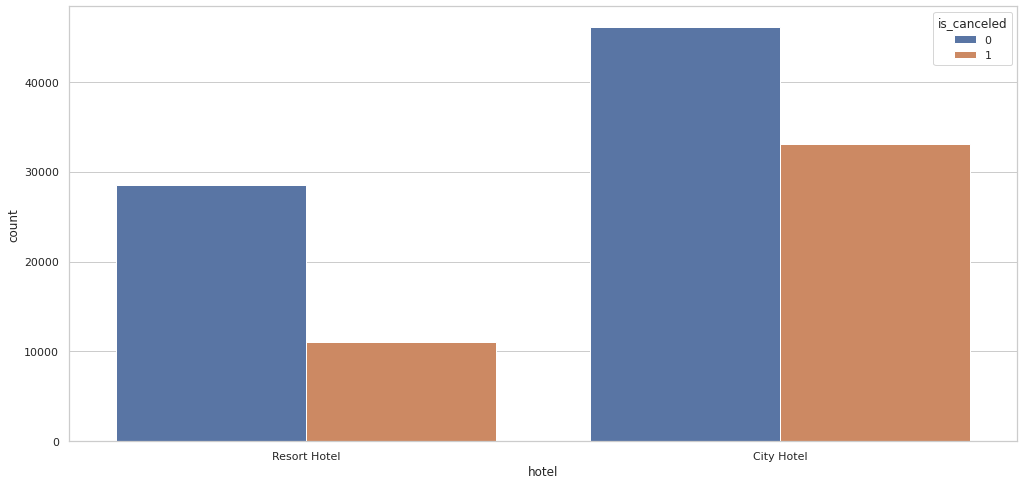

In [317]:
# plotting a bar plot representing count of cancelled and non cancelled bookings depending upon the type of hotel.
plt.figure(figsize=(17,8))
sns.countplot(data=new_hotel_df, x='hotel', hue='is_canceled')
plt.show()

In [352]:
cancellations_=new_hotel_df[new_hotel_df['is_canceled']==1]

cancellation_df=cancellations_['hotel'].value_counts().reset_index()
omk=hotel_bookings['hotel'].value_counts()
cancellation_df['total_bookings']=omk.reset_index()['hotel']
cancellation_df['percentage_cancelled']=cancellation_df['hotel']*100/cancellation_df['total_bookings']

In [353]:
cancellation_df

,index,hotel,total_bookings,percentage_cancelled
0,City Hotel,33065,79330,41.680323
1,Resort Hotel,11077,40060,27.651023


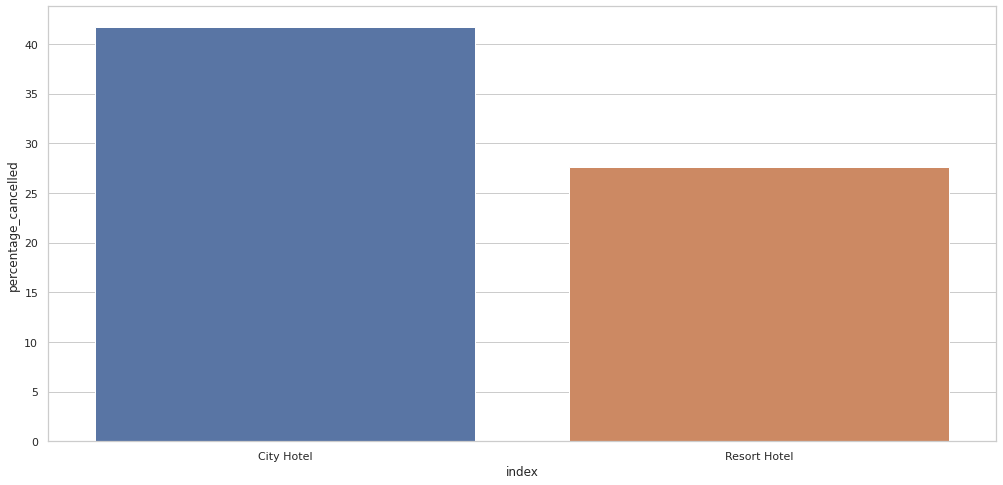

In [354]:
# visualizing the percentage of bookings cancelled in case of Resort Hotels and City Hotels
plt.figure(figsize=(17,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="percentage_cancelled", data=cancellation_df)
plt.show()

**Conclusion**- From above graph we can observe that number of booking cancellations are higher in City Hotels. Also based on bar plot plotted to show % of bookings cancelled in Resort Hotels and City Hotels, We can see that almost 42% of the bookings made for city hotels are cancelled and almost 28% of bookings made for Resort Hotels are cancelled.

#**Analysis III**

---



#**Most preffered month for hotel booking**

In [321]:
# Most preffered month by the customers.
most_preffered_month = new_hotel_df['arrival_date_month'].value_counts()
most_preffered_month.reset_index()

,index,arrival_date_month
0,August,13840
1,July,12611
2,May,11768
3,October,11082
4,April,11038
5,June,10917
6,September,10459
7,March,9713
8,February,7997
9,November,6731


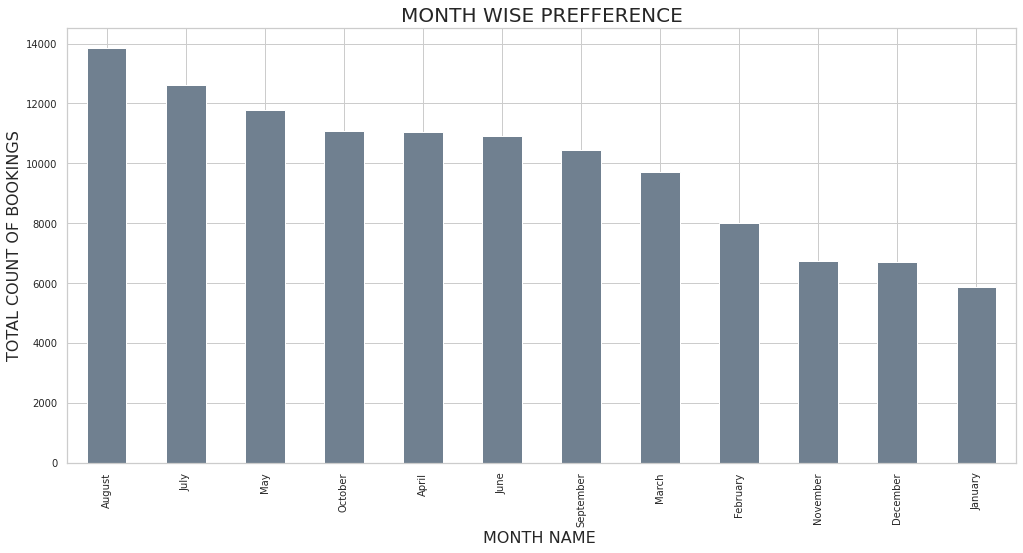

In [322]:
# Visualisation of data for most preffered month.
most_preffered_month.plot(kind = 'bar',color ='slategray',fontsize = 10,figsize=(17,8))
plt.title('MONTH WISE PREFFERENCE',fontsize = 20)
plt.xlabel('MONTH NAME ',fontsize = 16)
plt.ylabel('TOTAL COUNT OF BOOKINGS',fontsize = 16)
plt.show()

# Its clear from this bar chart that most of the bookings received were for the month of August.

**Conclusion**-  We can observe that guests preferred August month more than other months.

#**Analysis IV**

---



#**Country wise guests of hotels**


In [323]:
#Top 15 countries from where guests come 

top_15_countries = new_hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:15]
top_15_countries = top_15_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [324]:
#adding percentage column
top_15_countries['percentage'] = (top_15_countries['number_of_bookings']/top_15_countries['number_of_bookings'].sum())*100

In [325]:
top_15_countries

,country,number_of_bookings,percentage
0,PRT,20977,31.192565
1,GBR,9668,14.376208
2,FRA,8468,12.591822
3,ESP,6383,9.491450
4,DEU,6067,9.021561
5,IRL,2542,3.779926
6,ITA,2428,3.610409
7,BEL,1868,2.777695
8,NLD,1716,2.551673
9,USA,1592,2.367286


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



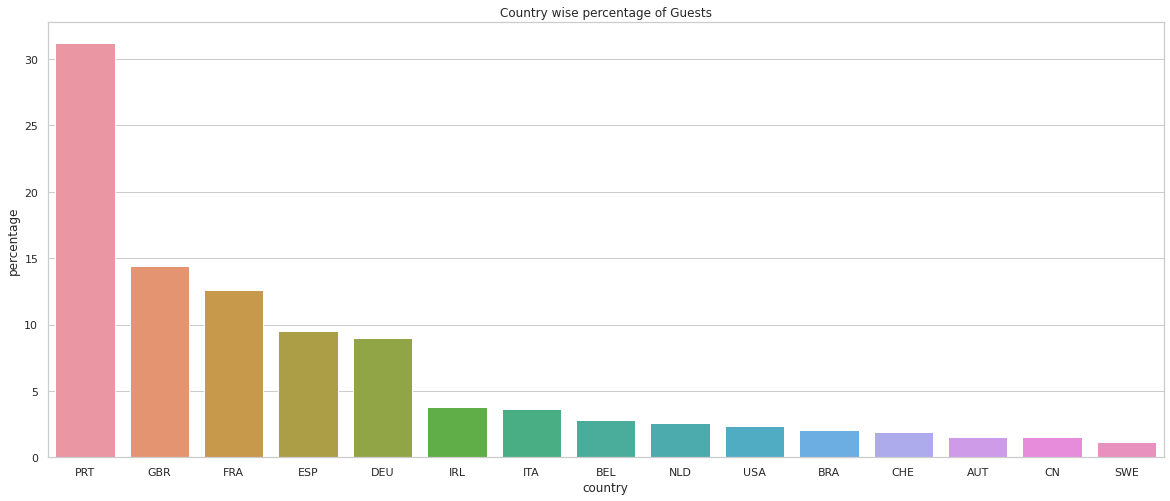

In [350]:
# visualizing the count of guests coming from different countries using a bar plot.
plt.figure(figsize=(20,8))
sns.barplot(top_15_countries['country'],top_15_countries['percentage']).set(title='Country wise percentage of Guests')
plt.show()

**Conclusion**-  Large number of guests came from Portugal

# **Analysis V**

---



**Visualizing above information on global map to see if any pattern is present depending on regions.**

In [327]:
import json

In [328]:
world_map=json.load(open('/content/drive/MyDrive/custom.geo.json',))

In [329]:
world_map['features'][0]['properties']['adm0_a3']

'BHS'

In [330]:
import plotly.express as px

In [331]:
#current plotly version is 4.4.1 which is not compatible for json files.
#We need to upgrade plotly to current version 5.5.0


import plotly
plotly.__version__

'5.5.0'

In [332]:
pip install plotly --upgrade

In [333]:
mapping=px.choropleth(top_15_countries,locations='country',color='number_of_bookings')

In [334]:
mapping.show()

**Conclusion-**We can observe that most number of bookings are from Europian countries,USA,Brazil.

To serve current customers of above mentioned countries hotels can improve by offering these guests with curtailed services to improve thier satisfaction.One such thing could be - offering food delicacies famous in those countries.

Developing marketing strategies to attract tourists from asian and african countries can help these hotels in increasing their profits

#**Analysis VI**

---







## **Which segment brings in the most of the bookings?**

In [335]:
# Different market segments and their total counts in the dataset.
market_segment_booking = new_hotel_df['market_segment'].value_counts()
df_plot_market_segment=pd.DataFrame(market_segment_booking)


In [336]:
df_plot_market_segment=df_plot_market_segment.reset_index()

In [337]:
df_plot_market_segment

,index,market_segment
0,Online TA,56334
1,Offline TA/TO,24125
2,Groups,19786
3,Direct,12425
4,Corporate,5099
5,Complementary,726
6,Aviation,235
7,Undefined,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



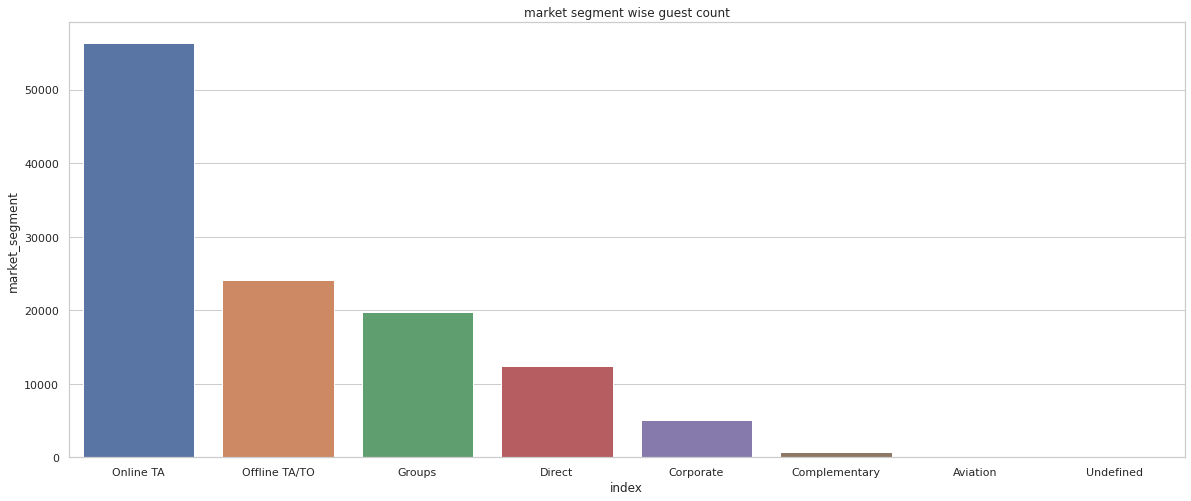

In [349]:
plt.figure(figsize=(20,8))
sns.barplot(df_plot_market_segment['index'],df_plot_market_segment['market_segment']).set(title='market segment wise guest count')
plt.show()

**Conclusion**- We can observe that most bookings received are Online

# **Analysis VII**

---



# **Analyzing according to meals ordered**

In [339]:
unique_meal_count=new_hotel_df['meal'].value_counts()
meals=unique_meal_count.reset_index()
meals['percentage']=meals['meal']*100/sum(meals['meal'])
meals

,index,meal,percentage
0,BB,91793,77.311087
1,HB,14429,12.152579
2,SC,10547,8.883031
3,Undefined,1165,0.981201
4,FB,798,0.672102


In [340]:
# Percentage of meal type count.
percentage_meal_count = new_hotel_df['meal'].value_counts(normalize= True)*100
meals_=pd.DataFrame(percentage_meal_count.reset_index())

In [341]:
meals_

,index,meal
0,BB,77.311087
1,HB,12.152579
2,SC,8.883031
3,Undefined,0.981201
4,FB,0.672102


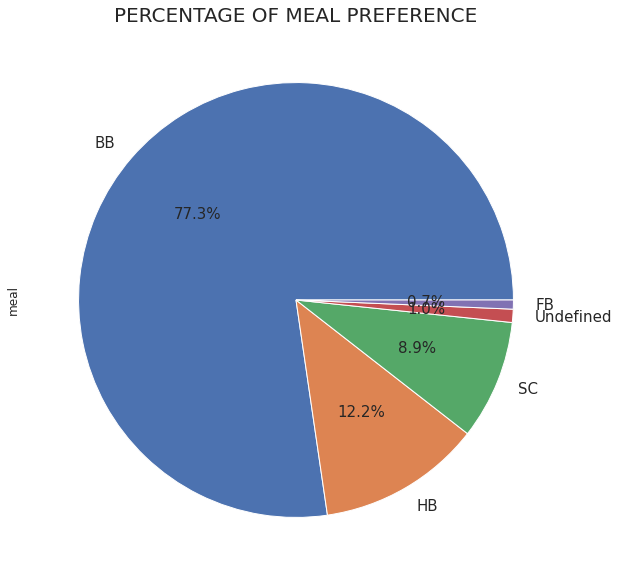

In [342]:
# Visualisation of percentage meal count
percentage_meal_count.plot(kind = 'pie',labels=percentage_meal_count.index,figsize=(10,10),autopct='%0.1f%%',fontsize=15)
plt.title('PERCENTAGE OF MEAL PREFERENCE', fontsize=20)
plt.show()

**Conclusion**-We can observe that most of the guests have booked BB (Bread and Breakfast)

# **Analysis VIII**

---







# **Repeated guests Analysis**


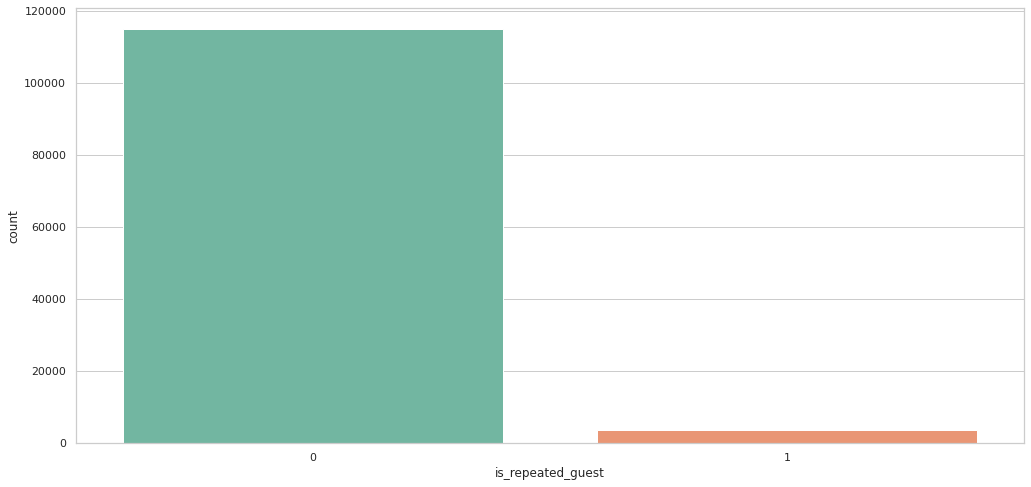

In [343]:
# use a different colour palette in count plot
plt.figure(figsize=(17,8))
sns.countplot(x ='is_repeated_guest', data = new_hotel_df, palette = "Set2")
 
# Show the plot
plt.show()

**Conclusion**- We can observe that number of repeated guests is very less

# **Analysis IX**

---



# **Analysis on the basis of ADR(average daily rate)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



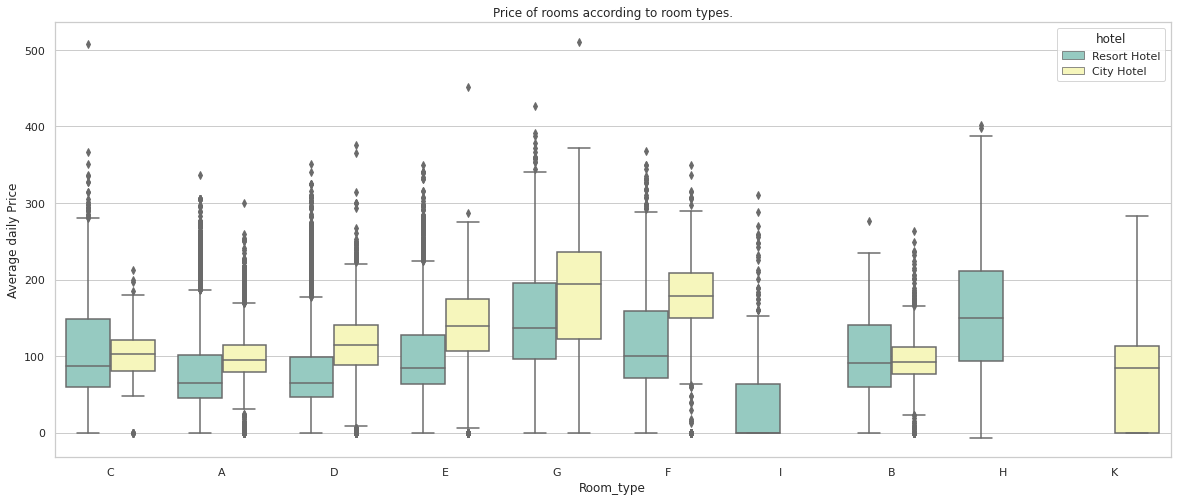

In [348]:
# average daily rate according to room type booked
new_hotel_df_adr=new_hotel_df[hotel_df['is_canceled']==0]

# Visualisation.
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="assigned_room_type", y="adr", hue="hotel",data=new_hotel_df_adr, palette="Set3")
plt.title('Price of rooms according to room types.')
plt.xlabel('Room_type')
plt.ylabel('Average daily Price')
plt.show()

**Conclusion**-We can observe that in city hotels highest room ADR was for room type G and was lowest for the room type K. In case of Resort Hotels highest ADR was for room type H and was lowest for room type I.

In [345]:
# Average ADR of different months and year.
adr_month_year= new_hotel_df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year.unstack()

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,89.147480,111.662297
August,105.941901,143.030842,164.315096
December,74.483823,86.796953,NaN
February,NaN,70.497790,77.141138
January,NaN,65.155842,74.104415
July,97.921384,125.804134,143.100379
June,NaN,107.079756,125.902174
March,NaN,79.442532,82.731363
May,NaN,96.512640,119.485098


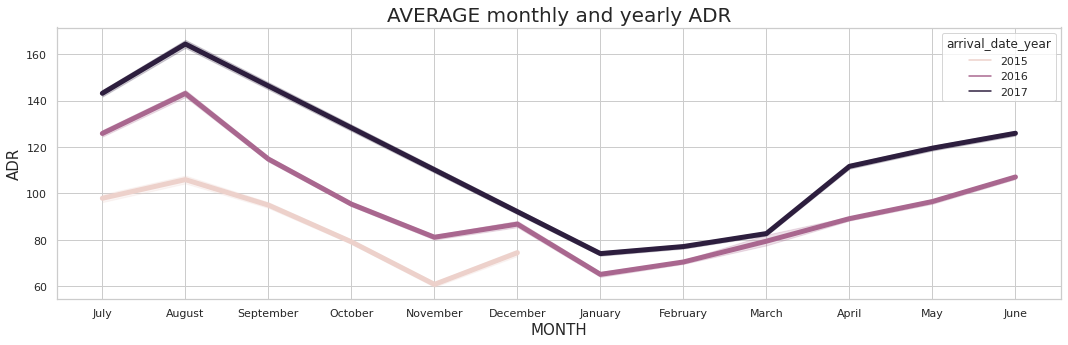

In [346]:
# Visualizing average daily rate over the months for different years.
line,ax = plt.subplots(figsize=(18,5)) 
sns.lineplot(x='arrival_date_month',y='adr',data=new_hotel_df,hue='arrival_date_year',linewidth=5)
ax.set_title('AVERAGE monthly and yearly ADR', fontsize=20)
ax.set_xlabel ('MONTH',fontsize=15)
ax.set_ylabel ('ADR',fontsize=15)
plt.show()

**Conclusion**- We can observe that average daily count rate has decreasing trend after having peak value in August. This decreasing trend continues till month of January and after month of January ADR starts to increase and this trend is again observed till the month of August. ALso on comaparing year wise we notice that each year ADR has been consistently increasing.

# **Corralation Plot**

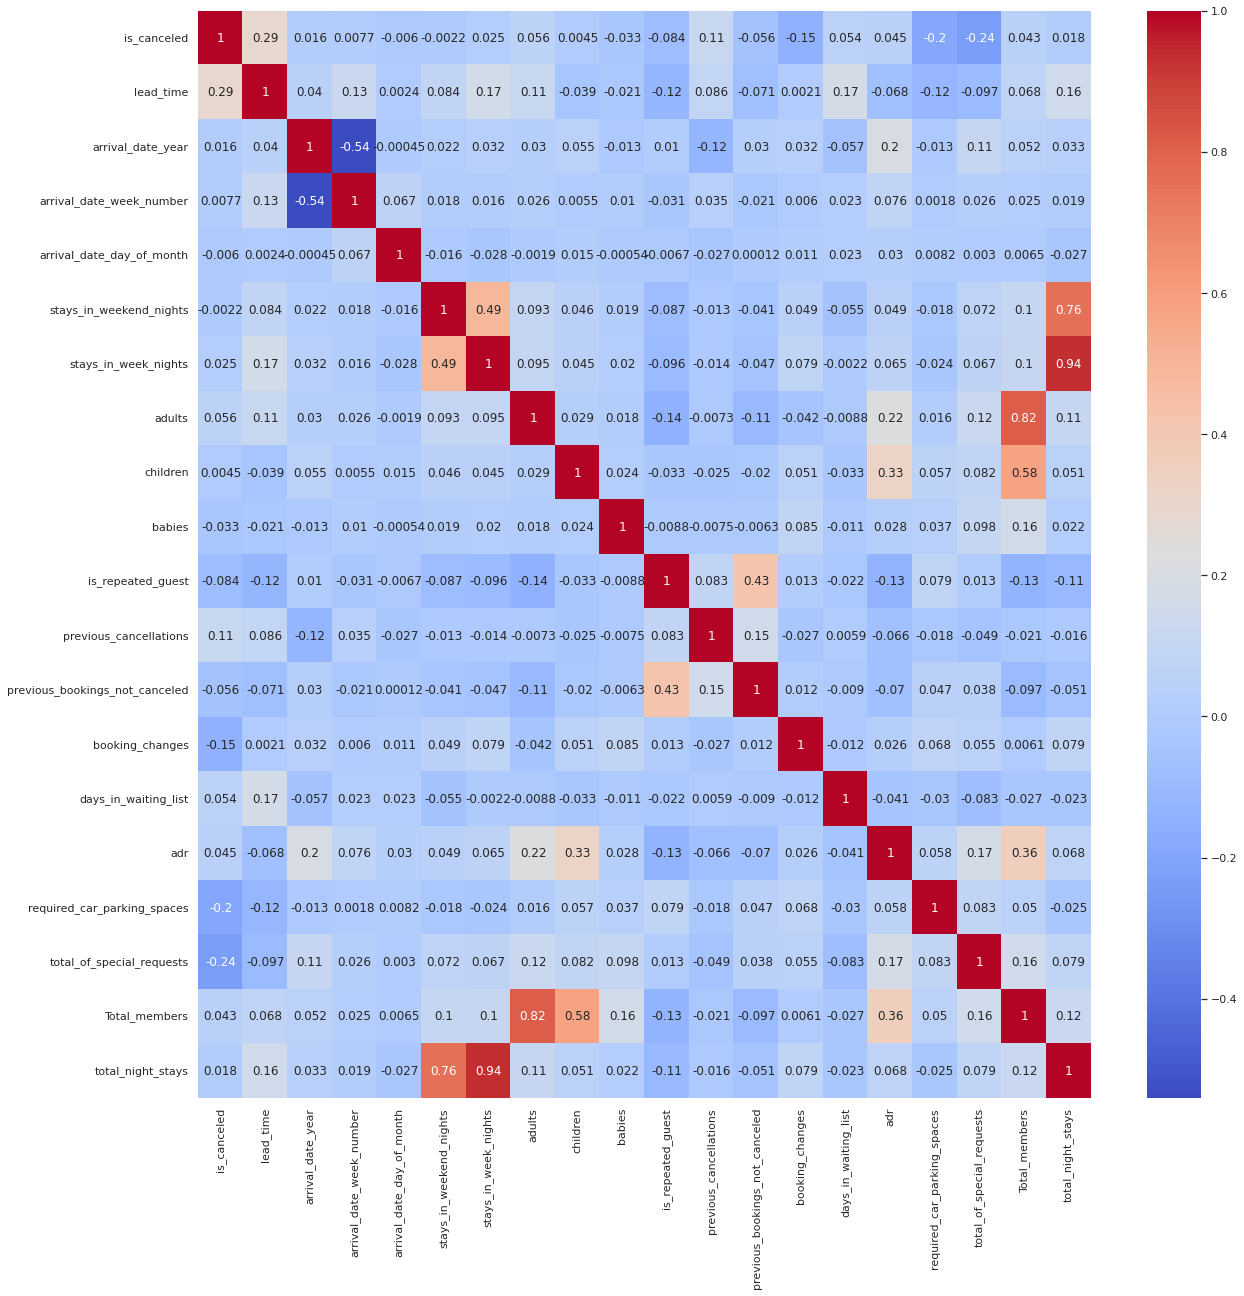

In [347]:
plt.figure(figsize=(20,20))
sns.heatmap(new_hotel_df.corr(), cmap= 'coolwarm' ,annot=True);
plt.show()

Here dependence of all columns with respect to other columns is represented using heat map.

Comparitively the columns that have relatively higher positive correlation wrt all columns are-

1. lead time and cancellation of booking.
2. adr and presence of children in guests.
3. Previous boooking not cancelled and repeated guest.

## **Summary of Conclusions:-**

1. 'City hotels' and 'Resort hotels' are two types of hotels present in the dataset. city hotels received 66.7 % of total hotel bookings and Resort hotels received 33.3% of total hotel bookings. 

2.  we can observe that number of booking cancellations are higher in City Hotels. 
Also based on bar plot plotted to show % of bookings cancelled in Resort Hotels and City Hotels, We can see that almost 42% of the bookings made for city hotels are cancelled and almost 28% of bookings made for Resort Hotels are cancelled.

3. 'August' witnessed highest number of hotel bookings whereas 'January' witnessed the least.

4. Guests from PRT(Portugal) have got the maximum number of hotel bookings.

5. We can observe that most number of bookings are from Europian countries,USA,Brazil.

6. 'Online TA' brings maximum bookings.

7. 'August' has got the highest average ADR in each year.

8. Its found that 77.3% of customers prefers BB(Bread & Breakfast).

9. Its observed that most of the customers rather guests do not repeat their bookings.

10. We can observe that in city hotels highest room ADR was for room type G and was lowest for the room type K. In case of Resort Hotels highest ADR was for room type H and was lowest for room type I.

11. It is observed that average daily count rate has decreasing trend after having peak value in August. This decreasing trend continues till month of January and after month of January ADR starts to increase and this trend is again observed till the month of August.

12. Each year ADR has been increasing consistently.